###Проверка (предсказание).###

In [ ]:
from PIL import Image 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image 

In [ ]:
# Загружаем сохраненную модель.
from keras.models import load_model
model_unet = load_model('/content/unet5_1e3.h5')

In [ ]:
Iris = 1
IMG_WIDTH = 256            
IMG_HEIGHT = 256 

In [ ]:
def get_mask(prediction):
  temp = np.zeros((1,IMG_HEIGHT, IMG_WIDTH), dtype='uint8')
  temp[np.where(np.expand_dims(np.all(prediction != Iris, axis=0),axis=0))] = 0
  temp[np.where(np.expand_dims(np.all(prediction == Iris,axis=0),axis=0))] = 1  
  return temp

In [ ]:
def load_images(path):
  imgRGB = image.load_img(path,target_size=(IMG_HEIGHT, IMG_WIDTH))
  img_gray = image.load_img(path, color_mode='grayscale', target_size=(IMG_HEIGHT, IMG_WIDTH))
  return imgRGB, img_gray

In [ ]:
# Функция визуализации сегментации сетью реального изображения (предсказание).
def show_prediction(model,        
                    path,  
                   ):
  imgRGB,img_gray=load_images(path)
  x = image.img_to_array(img_gray) 
  img=np.array([x])/255   # Переводим в нампи и нормализуем.
  predict = np.argmax(model.predict(img,verbose=0), axis=-1)  # Вычисление предсказания сети для картинок с отобранными индексами.
  mask = get_mask(predict)
  masked_img=imgRGB*np.expand_dims(np.squeeze(mask,axis=0),axis=-1)
  plt.imshow(masked_img)
  plt.axis('off')

  plt.show()

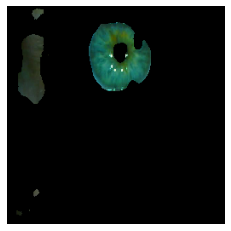

In [ ]:
show_prediction(model_unet,'/content/02_right_32.jpg')